In [1]:
from fastquant import get_stock_data
from hmmlearn import hmm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [67]:
def data_prep(data):
    df = pd.DataFrame(data=None, columns=['fracChange'])
    df['fracChange'] = (data['close']-data['open'])/data['open']

    return df

In [12]:
training_data = get_stock_data("AAPL", "2003-02-10", "2004-09-10")
testing_data = get_stock_data("AAPL", "2004-09-13", "2005-01-21")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
train = data_prep(training_data)

In [16]:
train.head()

,fracChange,fracHigh,fracLow
dt,,,
2003-02-10,0.006311,0.021740,0.014027
2003-02-11,-0.010347,0.008964,0.020693
2003-02-12,0.008410,0.023126,0.000000
2003-02-13,0.009024,0.015965,0.011795
2003-02-14,0.004105,0.007528,0.017797


<AxesSubplot:>

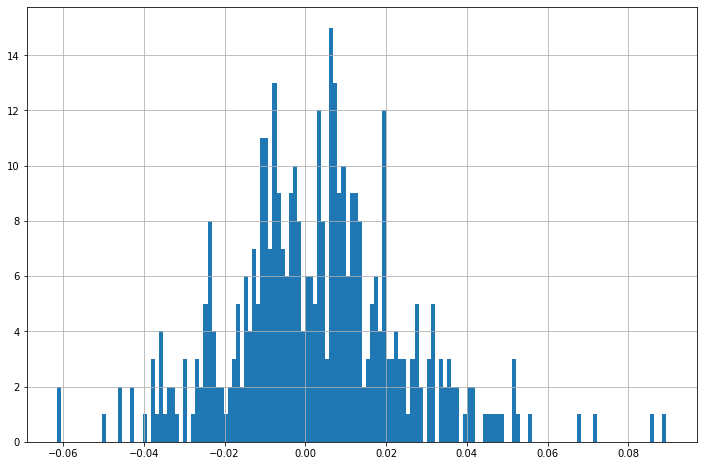

In [26]:
train['fracChange'].hist(figsize=(12,8),bins=150)

In [20]:
train['fracChange'].mean()

0.002667422083201525

In [21]:
train['fracChange'].std()

0.021241238692026366

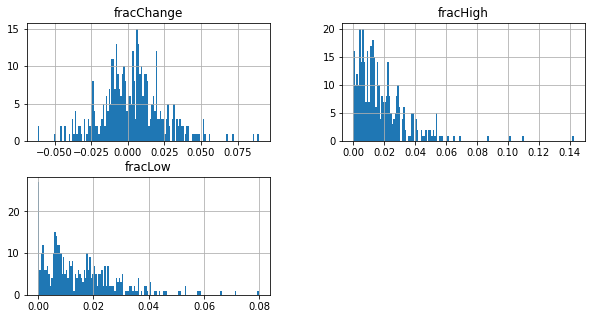

In [25]:
_ = train.hist(figsize=(10,5), bins=150)

In [27]:
test = data_prep(testing_data)

<AxesSubplot:>

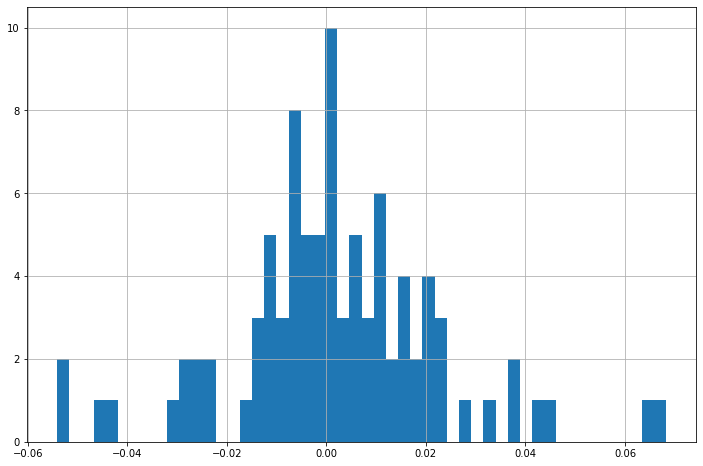

In [29]:
test['fracChange'].hist(figsize=(12,8),bins=50)

In [30]:
training_data = get_stock_data("IBM", "2003-02-10", "2004-09-10")
testing_data = get_stock_data("IBM", "2004-09-13", "2005-01-21")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [31]:
train = data_prep(training_data)

<AxesSubplot:>

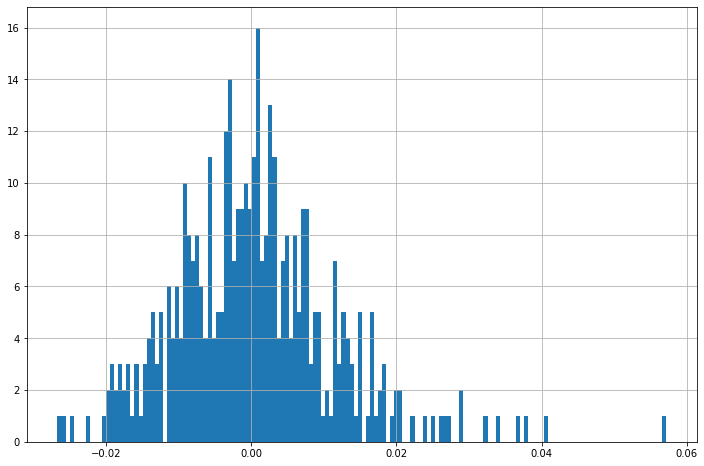

In [32]:
train['fracChange'].hist(figsize=(12,8),bins=150)

In [33]:
{'ticker':'DPZ', 'start':'2009-01-01', 'end':'2015-01-01'}

{'ticker': 'DPZ', 'start': '2009-01-01', 'end': '2015-01-01'}

In [34]:
training_data = get_stock_data("DPZ", "2009-01-01", "2015-01-01")

[*********************100%***********************]  1 of 1 completed


In [35]:
train = data_prep(training_data)

<AxesSubplot:>

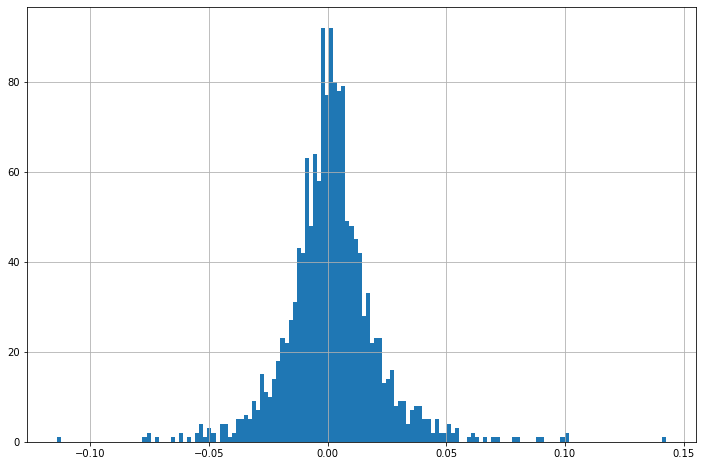

In [36]:
train['fracChange'].hist(figsize=(12,8),bins=150)

In [37]:
params = {'mu':train['fracChange'].mean(), 'std':train['fracChange'].std()}

In [38]:
samples = np.random.normal(loc=params['mu'], scale=params['std'], size=10000)

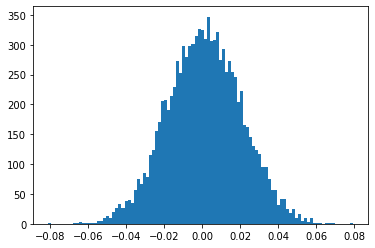

In [41]:
plt.hist(samples,bins=100)
plt.show()

In [44]:
samples.shape

(10000,)

In [45]:
np.arange(-0.2,0.2,0.4/10000).shape

(10000,)

In [49]:
training_data = get_stock_data("GME", "2019-01-01", "2021-04-22")

[*********************100%***********************]  1 of 1 completed


In [50]:
train = data_prep(training_data)

<AxesSubplot:>

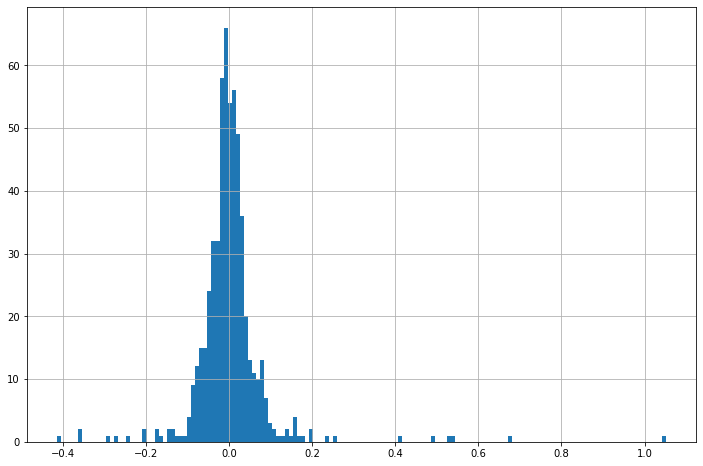

In [51]:
train['fracChange'].hist(figsize=(12,8),bins=150)

In [52]:
params = {'mu':train['fracChange'].mean(), 'std':train['fracChange'].std()}

In [53]:
samples = np.random.normal(loc=params['mu'], scale=params['std'], size=10000)

Text(0.5, 0, 'fractional change')

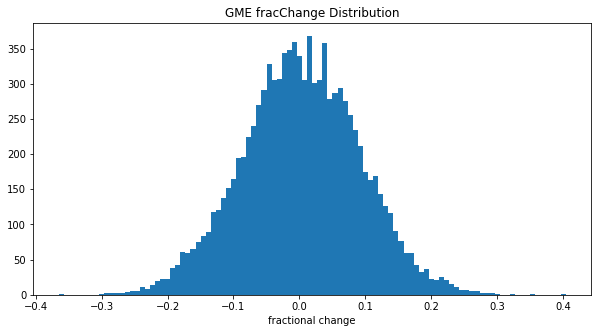

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('GME fracChange Distribution')
ax.hist(samples,bins=100)
ax.set_xlabel('fractional change')

In [70]:
def plot_hist(title, data):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_title(title)
    ax.hist(data,bins=100)
    ax.set_xlabel('fractional change')
    plt.savefig(f'../imgs/{title}.png')

[*********************100%***********************]  1 of 1 completed


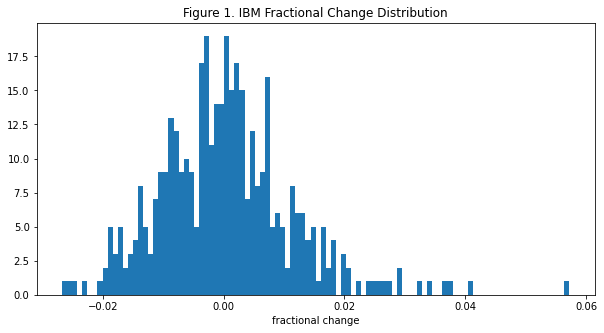

In [73]:
training_data = get_stock_data("IBM", "2003-02-10", "2004-09-10")
train = data_prep(training_data).values
plot_hist('Figure 1. IBM Fractional Change Distribution', train)

[*********************100%***********************]  1 of 1 completed


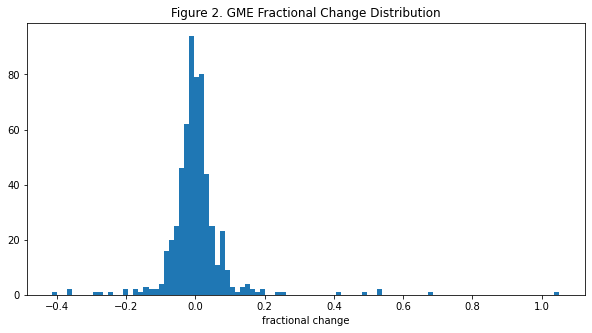

In [74]:
training_data = get_stock_data("GME", "2019-01-01", "2021-04-22")
train = data_prep(training_data).values
plot_hist('Figure 2. GME Fractional Change Distribution', train)